In [10]:
import tensorflow as tf
from glob import glob
import os

import matplotlib.pyplot as plt

import time

# Import data loader
from MultipleDataLoader import MultipleDataLoader

# Import model
from MultipleResidualCNN import MultipleResidualCNN

# Function for model training
from TrainingHelpers import compute_loss, train_step, show_pred, save_pred

In [2]:
data_dir = "DataNormalized/"
DataLoader = MultipleDataLoader(data_dir)

In [5]:
train_dataset.map?

In [6]:
batch_size = 4
#batch_size = 4

train_dataset = tf.data.TFRecordDataset(glob(data_dir +  "train/*/*/multiple.tfrecords"))
train_dataset = train_dataset.shuffle(len(glob(data_dir +  "train/*/*/multiple.tfrecords")))
train_dataset = train_dataset.map(lambda x: DataLoader.parse_multiple_fixed(x, augment=True), num_parallel_calls=tf.data.experimental.AUTOTUNE) 
train_dataset = train_dataset.batch(batch_size)

In [14]:
dev_dataset = tf.data.TFRecordDataset(glob(data_dir +  "dev/*/*/multiple.tfrecords"))
#dev_dataset = dev_dataset.shuffle(len(glob(data_dir +  "dev/*/*/multiple.tfrecords")))
dev_dataset = dev_dataset.map(DataLoader.parse_multiple_fixed, num_parallel_calls=tf.data.experimental.AUTOTUNE) 
dev_dataset = dev_dataset.batch(batch_size)

In [15]:
model = MultipleResidualCNN().model

### Test data input (model not trained)

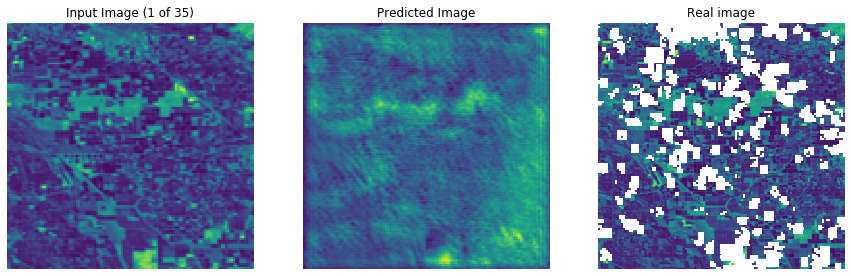

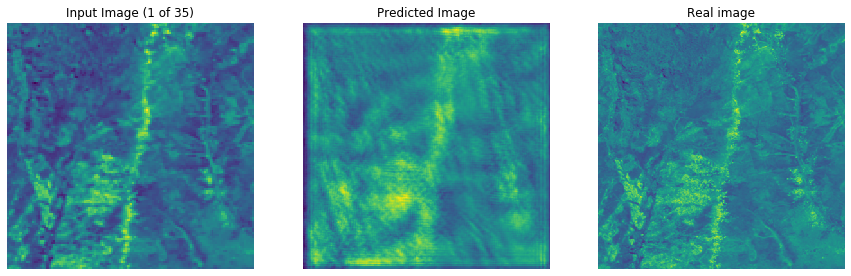

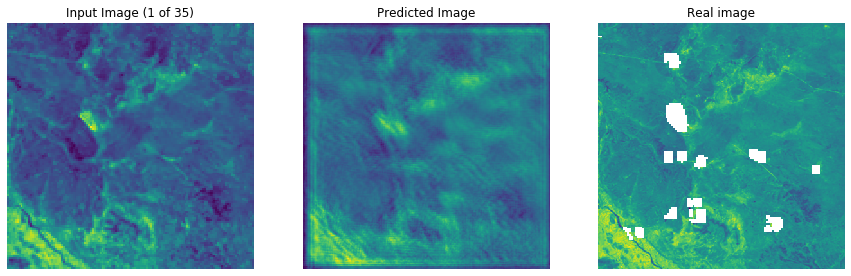

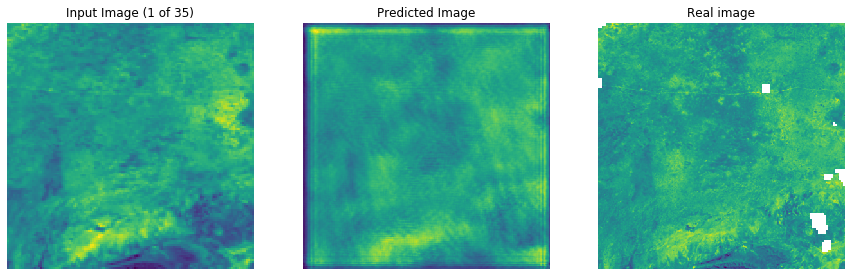

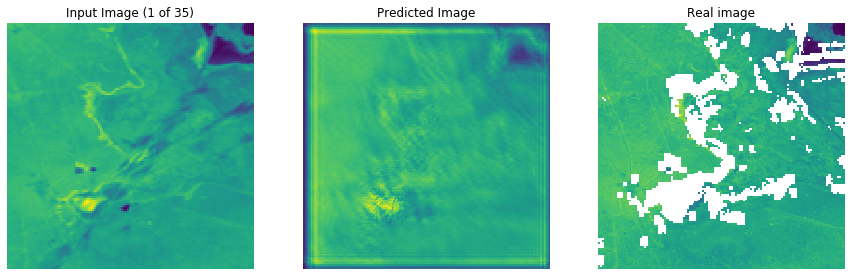

In [6]:
for lrs, hr in train_dataset.take(5):
    show_pred(model, lrs, hr)

In [7]:
EPOCHS = 10000
#optimizer = tf.keras.optimizers.Adam(1e-3)
optimizer = tf.keras.optimizers.Adam(1e-4)
#optimizer = tf.keras.optimizers.SGD(1)

In [8]:
import os

checkpoint_dir = './TrainingCheckpoint/MultipleResidualCNN'
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 model=model)


In [9]:
val_losses_record = []

def train(train_dataset, dev_dataset, optimizer, epochs):
    for epoch in range(epochs):
        start = time.time()
        
        loss = 0
        for lrs, hr in dev_dataset.take(1):
            loss += compute_loss(lrs, hr, model)
        val_losses_record.append(loss)
        
        for lrs, hr in train_dataset:
            train_step(lrs, hr, model, optimizer)
        
        # saving (checkpoint) the model every 100 epochs
        if (epoch + 1) % 50 == 0:
            checkpoint.save(file_prefix = checkpoint_prefix)
            
        if (epoch + 1) % 50 == 0:
            for lrs, hr in train_dataset.take(1):
                #show_pred(model, lrs, hr)
                save_pred(model, lrs, hr, "TrainMultipleResidualCNN", epoch)
            for lrs, hr in dev_dataset.take(1):
                #show_pred(model, lrs, hr)
                save_pred(model, lrs, hr, "DevMultipleResidualCNN", epoch)
                

        if (epoch + 1) % 5 == 0:
            print('Time taken for epoch {} is {} sec\n'.format(epoch + 1, time.time()-start))
            print('current val losses: ' + str(loss))
            print('=============================================')

# Train Model

In [10]:
train(train_dataset, dev_dataset, optimizer, EPOCHS)

W0712 23:10:29.891979 140104063010624 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/array_ops.py:1340: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Time taken for epoch 5 is 213.87149691581726 sec

current val losses: tf.Tensor(0.0045925677, shape=(), dtype=float32)
Time taken for epoch 10 is 214.00836777687073 sec

current val losses: tf.Tensor(0.004741107, shape=(), dtype=float32)
Time taken for epoch 15 is 213.86084723472595 sec

current val losses: tf.Tensor(0.005497714, shape=(), dtype=float32)
Time taken for epoch 20 is 213.923659324646 sec

current val losses: tf.Tensor(0.0053733815, shape=(), dtype=float32)
Time taken for epoch 25 is 213.7087106704712 sec

current val losses: tf.Tensor(0.0056248377, shape=(), dtype=float32)
Time taken for epoch 30 is 213.98024988174438 sec

current val losses: tf.Tensor(0.006151752, shape=(), dtype=float32)
Time taken for epoch 35 is 213.96936893463135 sec

current val losses: tf.Tensor(0.004687881, shape=(), dtype=float32)
Time taken for epoch 40 is 213.92447590827942 sec

current val losses: tf.Tensor(0.0065346896, shape=(), dtype=float32)
Time taken for epoch 45 is 214.38126707077026 se

Time taken for epoch 255 is 214.48799395561218 sec

current val losses: tf.Tensor(0.006065187, shape=(), dtype=float32)
Time taken for epoch 260 is 214.02509760856628 sec

current val losses: tf.Tensor(0.004114189, shape=(), dtype=float32)
Time taken for epoch 265 is 214.06031727790833 sec

current val losses: tf.Tensor(0.0061196974, shape=(), dtype=float32)
Time taken for epoch 270 is 214.5202877521515 sec

current val losses: tf.Tensor(0.00599526, shape=(), dtype=float32)
Time taken for epoch 275 is 214.4470512866974 sec

current val losses: tf.Tensor(0.0042419396, shape=(), dtype=float32)
Time taken for epoch 280 is 213.92282438278198 sec

current val losses: tf.Tensor(0.004211298, shape=(), dtype=float32)
Time taken for epoch 285 is 214.71891403198242 sec

current val losses: tf.Tensor(0.003783254, shape=(), dtype=float32)
Time taken for epoch 290 is 214.7303204536438 sec

current val losses: tf.Tensor(0.004064676, shape=(), dtype=float32)
Time taken for epoch 295 is 214.6840598583

KeyboardInterrupt: 

In [23]:
test_dataset = tf.data.TFRecordDataset(glob(data_dir +  "test/*/*/multiple.tfrecords"))
#dev_dataset = dev_dataset.shuffle(len(glob(data_dir +  "dev/*/*/multiple.tfrecords")))
test_dataset = test_dataset.map(DataLoader.parse_multiple_fixed, num_parallel_calls=tf.data.experimental.AUTOTUNE) 
test_dataset = test_dataset.batch(batch_size)

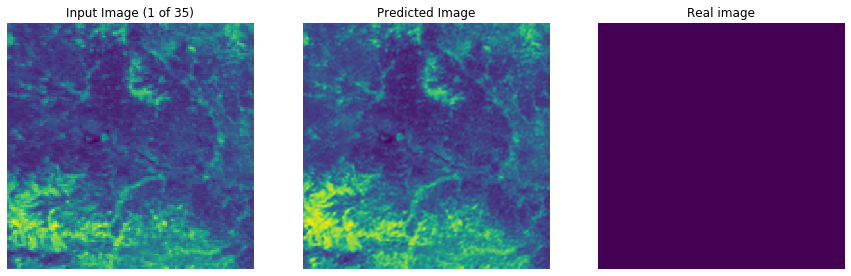

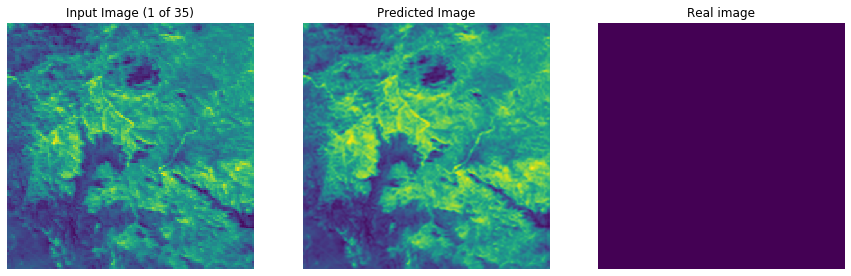

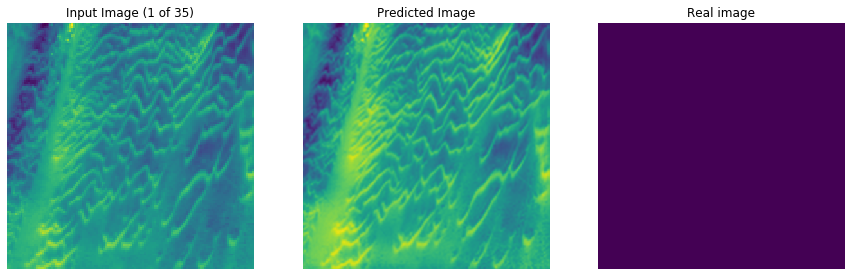

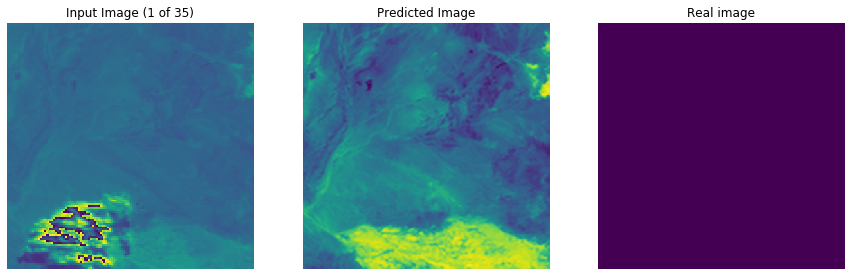

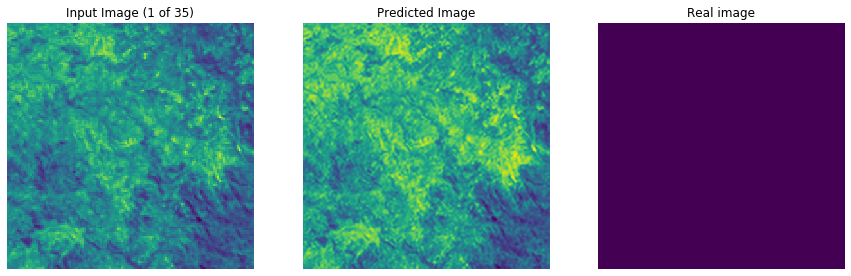

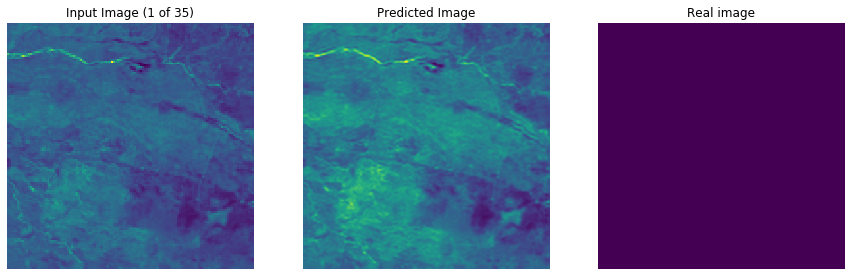

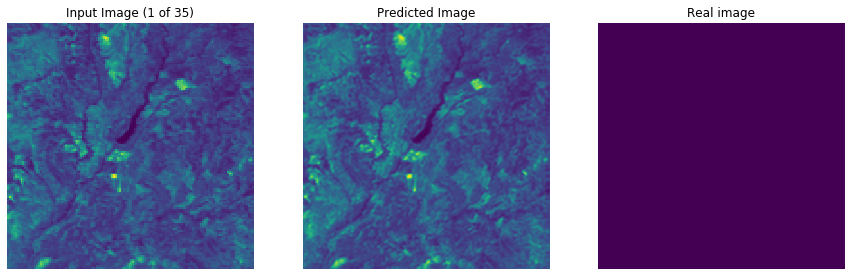

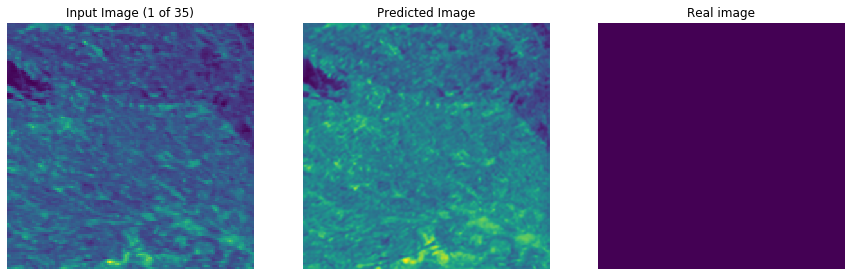

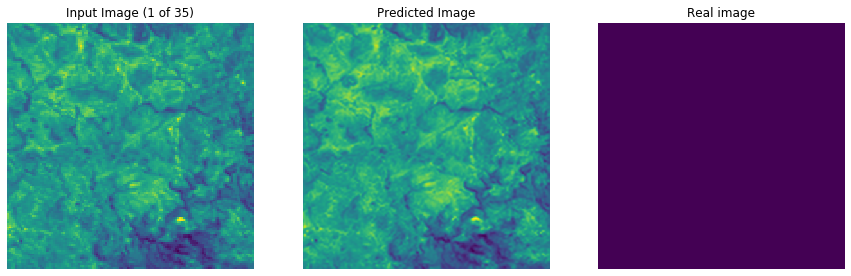

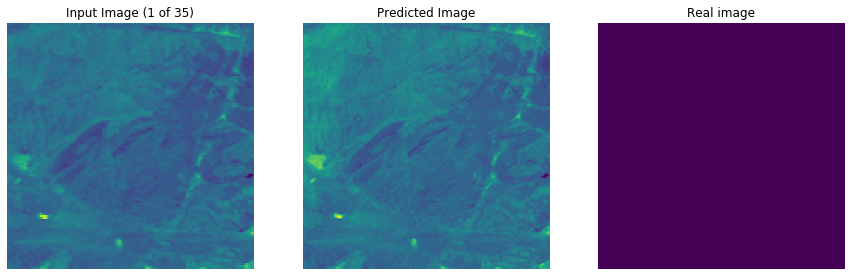

In [36]:
lrs_test = []
for lrs, hr in test_dataset.take(10):
    lrs_test.append(lrs)
    show_pred(model, lrs, hr)

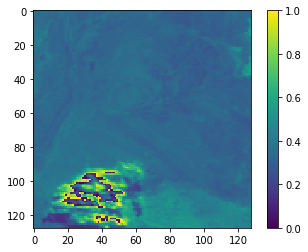

In [57]:
plt.imshow(lrs_test[3][0][:,:,0])
plt.colorbar()

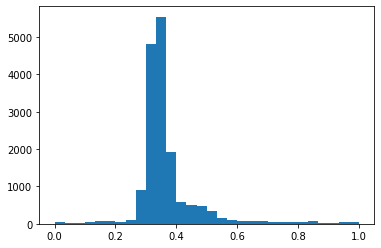

In [47]:
plt.hist(lrs_test[3][0][:,:,0].numpy().flatten(), bins = 30);

# Overfitting on 1 batch
(trained on train_dataset.take(1))

In [10]:
train(train_dataset, dev_dataset, optimizer, EPOCHS)

W0712 22:12:56.965324 139730270189376 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/array_ops.py:1340: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Showing current result
Showing current result
Showing current result
Showing current result
Showing current result
Showing current result
Showing current result
Showing current result
Showing current result
Showing current result
Time taken for epoch 250 is 2.1609926223754883 sec

current val losses: tf.Tensor(0.0012904109, shape=(), dtype=float32)
Showing current result
Showing current result
Showing current result
Showing current result
Showing current result
Showing current result
Showing current result
Showing current result
Showing current result
Showing current result
Time taken for epoch 500 is 2.134765148162842 sec

current val losses: tf.Tensor(0.0010692726, shape=(), dtype=float32)
Showing current result
Showing current result
Showing current result
Showing current result
Showing current result
Showing current result
Showing current result
Showing current result
Showing current result
Showing current result
Time taken for epoch 750 is 2.132901191711426 sec

current val losses

KeyboardInterrupt: 

Showing current result


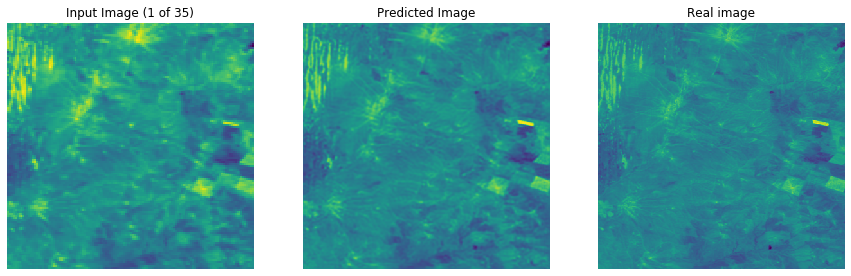

In [12]:
for lrs, hr in train_dataset.take(1):
    print("Showing current result")
    #show_pred(model, lrs, hr)
    show_pred(model, lrs[1:], hr[1:])


Showing current result


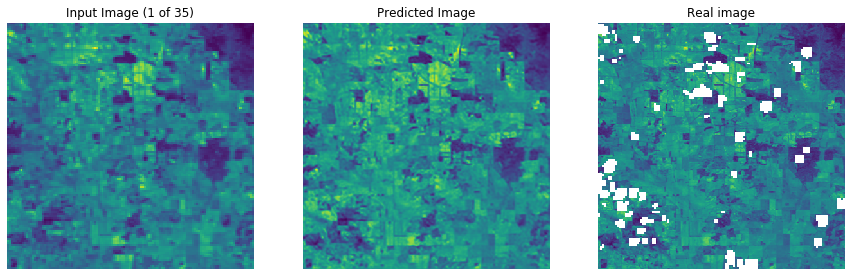

In [14]:
for lrs, hr in train_dataset.take(1):
    print("Showing current result")
    #show_pred(model, lrs, hr)
    show_pred(model, lrs[3:], hr[3:])
